# Narrow scan and wide scan

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- creation date : Monday 28th 2023

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is


plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [3]:
filedata="../data/orientations/narrowwidescan_2021-07-07_v2.csv"
df=pd.read_csv(filedata,index_col=0)

In [12]:
FLAG_SELECTYRANGE = (df["Y(mm)"] > -16.0) & (df["Y(mm)"] < 14.0)
df=df[FLAG_SELECTYRANGE]

In [13]:
# select narrow scan
FLAG_SELECT_NARROWSCAN = df["NarrowScan"]
FLAG_SELECT_WIDESCAN = df["NarrowScan"] != True
df_narrowscan = df[FLAG_SELECT_NARROWSCAN]
df_widescan = df[FLAG_SELECT_WIDESCAN]

In [14]:
df_narrowscan

,X(mm),Y(mm),degré,tag,Xpix,Ypix,Neff,Nefferr,NarrowScan
33,-15.002568,-0.706926,-0.162785,317,-1500.256801,-70.692597,152.047019,0.117710,True
34,-15.018391,0.302659,-0.190253,318,-1501.839080,30.265929,152.131678,0.122719,True
35,-14.982936,1.271912,-0.168207,319,-1498.293580,127.191212,152.297570,0.107075,True
36,-14.951200,2.272468,-0.166700,320,-1495.119952,227.246845,152.093401,0.117709,True
37,-15.020588,3.245897,-0.169779,321,-1502.058766,324.589715,152.494948,0.140510,True
38,-14.937495,4.253821,-0.174680,322,-1493.749510,425.382051,152.219014,0.126668,True
39,-14.899517,5.241174,-0.178528,323,-1489.951749,524.117394,152.520340,0.135739,True
40,-15.959115,-1.065228,-0.163014,324,-1595.911484,-106.522817,152.064066,0.138760,True
41,-15.976251,-0.070602,-0.167150,325,-1597.625139,-7.060212,152.088460,0.107080,True
42,-15.914033,0.925405,-0.169371,326,-1591.403338,92.540517,152.056379,0.120354,True


In [15]:
def getXY(df):
    NumberofPointsData=len(df)
    Xdata=df["X(mm)"].values
    Ydata=df["Y(mm)"].values
    return Xdata,Ydata
   

In [16]:
X1,Y1 = getXY(df_narrowscan)
X2,Y2 = getXY(df_widescan)

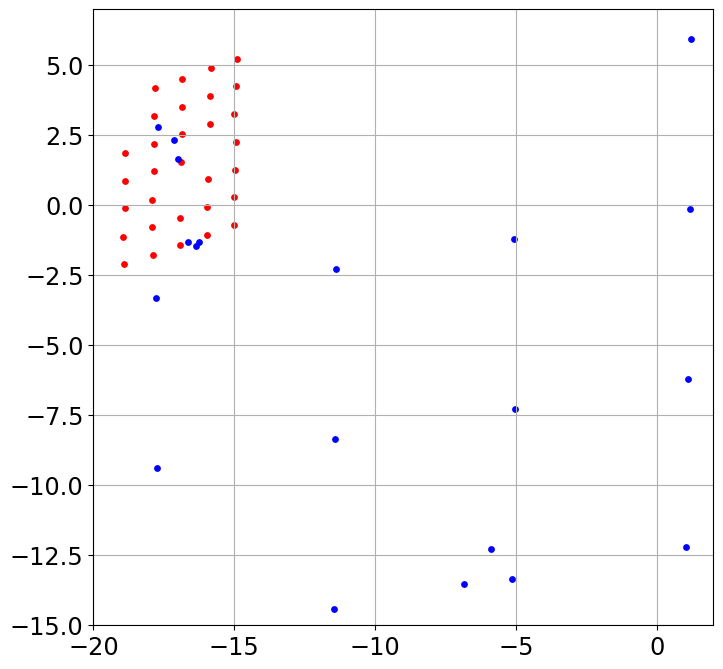

In [24]:
plt.figure(figsize=(8,8))
plt.scatter(X1,Y1,marker="o",color='r',s=15)
plt.scatter(X2,Y2,marker="o",color='b',s=15)
plt.ylim(-15,7)
plt.xlim(-20,2)
plt.grid()

In [18]:
Y2

array([-13.53670602, -12.27379635,  -1.32580559,  -1.32690005,
        -1.43975923, -12.22097148,  -6.19028589,  -0.12276853,
         5.9407307 ,  12.01233229, -13.33437055,  -7.26962841,
        -1.19252844,  10.93529425, -14.40511503,  -8.33637473,
        -2.28297126,   9.86509402, -15.43681261,  -9.38084157,
        -3.29800944,   2.79222725,   8.88849883,   1.64918546,
         2.32439942])

In [25]:
X2

array([ -6.83433191,  -5.87963092, -16.64181975, -16.23680343,
       -16.35892156,   1.01969081,   1.11423003,   1.1627607 ,
         1.19823469,   1.27626012,  -5.1614355 ,  -5.02270025,
        -5.08295342,  -4.90059021, -11.46785741, -11.41476854,
       -11.39013979, -11.32503167, -17.70143163, -17.75426449,
       -17.77866536, -17.72047897, -17.74677556, -17.00293327,
       -17.12203565])

In [26]:
X2[0] - X2[1]

-0.9547009858529627

In [27]:
X1

array([-15.00256801, -15.0183908 , -14.9829358 , -14.95119952,
       -15.02058766, -14.9374951 , -14.89951749, -15.95911484,
       -15.97625139, -15.91403338, -15.86159815, -15.86984772,
       -15.82412662, -16.93253361, -16.91576692, -16.87201594,
       -16.87078334, -16.85186917, -16.84436624, -17.89860623,
       -17.91510482, -17.9312867 , -17.86412521, -17.85408105,
       -17.83811617, -17.80883272, -18.92111148, -18.93870581,
       -18.86569429, -18.87461164, -18.87266135])

In [28]:
X1[0] - X1[1]

0.015822790636777384

In [30]:
X1[1] - X1[2]

-0.03545499790890716

In [31]:
X1[2] - X1[3]

-0.03173627607831975

In [32]:
X1[4] - X1[5]

-0.08309255216087585

In [33]:
X1[5] - X1[6]

-0.03797761505066788